In [214]:
import pandas as pd
import sys
import numpy as np

In [2]:
#!pip uninstall hunga-bunga --yes

In [3]:
train  = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')
result = pd.read_excel('result.xlsx')

In [4]:
train[:5]

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
0,12.0,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,0.774000,0.799167,0.174639,0.727789,NK,0.0
1,33.0,2412.8305,NaN,0.157153,0.755472,0.453216,0.715147,NaN,0.523432,0.388729,0.519233,0.799167,0.563573,0.111216,ARGILLIT,0.0
2,33.0,2522.5575,NaN,0.172235,0.941742,0.525711,0.668600,NaN,0.588924,0.515214,0.527139,0.799167,0.551152,0.172359,ARGILLIT,0.0
3,49.0,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,0.575175,0.799167,0.429433,0.253563,ARGILLIT,0.0
4,49.0,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,0.575725,0.799167,0.447169,0.959633,ARGILLIT,0.0


In [103]:
train.iloc[125230]

well id            13
depth, m      2286.55
bk           0.219638
GZ1          0.173533
GZ2          0.835496
GZ3          0.425187
GZ4          0.672438
GZ5          0.148532
GZ7          0.647817
DGK          0.451842
NKTD         0.342149
NKTM         0.517482
NKTR         0.439241
ALPS         0.271787
lith        ALEVROLIT
goal                0
Name: 125230, dtype: object

In [104]:
train.iloc[128492]

well id            13
depth, m      2286.72
bk            0.24952
GZ1          0.169645
GZ2          0.754324
GZ3          0.421347
GZ4           0.61717
GZ5          0.148532
GZ7          0.674217
DGK          0.479664
NKTD         0.345923
NKTM         0.515723
NKTR          0.44663
ALPS         0.274478
lith        ALEVROLIT
goal                0
Name: 128492, dtype: object

In [5]:
train.fillna(0, inplace=True)

In [6]:
train.describe()

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,goal
count,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000,465096.000000
mean,156.624994,2340.714509,0.301883,0.244036,0.338601,0.446509,0.161452,0.097156,0.180136,0.141877,0.258189,0.259655,0.128890,0.380011,0.150227
std,86.518091,402.562961,0.186004,0.174513,0.295100,0.274443,0.287997,0.165398,0.292954,0.210669,0.205655,0.272957,0.208668,0.253311,0.357294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,2173.776000,0.196348,0.151864,0.126251,0.236196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168399,0.000000
50%,166.000000,2391.977000,0.317619,0.231755,0.182283,0.453581,0.000000,0.000000,0.000000,0.000000,0.316475,0.000000,0.000000,0.318824,0.000000
75%,232.000000,2581.180000,0.388959,0.287222,0.567430,0.668230,0.156749,0.183785,0.351324,0.357816,0.393153,0.523462,0.358733,0.559920,0.000000
max,287.000000,3155.591000,0.999848,0.999973,0.999756,0.999994,0.999960,0.998834,0.999648,0.999514,0.799599,0.799167,0.998569,0.999996,1.000000


In [7]:
from sklearn import preprocessing

In [8]:
ids = train['well id']

In [9]:
dense_train = train[train.columns[1:-3]]

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
dense_train_scaled = min_max_scaler.fit_transform(dense_train)

In [11]:
dense_train_scaled[:5]

array([[0.96414998, 0.45584762, 0.77402056, 0.77418891, 0.33284805,
        0.47656398, 0.77490357, 0.24498382, 0.12371135, 0.96798537,
        1.        , 0.17488977],
       [0.7646208 , 0.        , 0.15715676, 0.7556562 , 0.45321847,
        0.71517533, 0.        , 0.52361605, 0.38891753, 0.64936715,
        1.        , 0.56438115],
       [0.79939305, 0.        , 0.17223992, 0.94197218, 0.52571448,
        0.66862663, 0.        , 0.58913154, 0.51546392, 0.65925427,
        1.        , 0.55194216],
       [0.75940212, 0.3813061 , 0.24684478, 0.11694138, 0.73265874,
        0.1513046 , 0.16541176, 0.65718639, 0.44613402, 0.71932995,
        1.        , 0.43004867],
       [0.76025299, 0.35692142, 0.22624735, 0.15551119, 0.61330346,
        0.17395564, 0.29754131, 0.77348978, 0.39293354, 0.72001775,
        1.        , 0.44780955]])

In [12]:
target = train['goal']

In [13]:
target[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: goal, dtype: float64

In [14]:
ln = len(target)

In [16]:
ex1 = dense_train_scaled[ids==12]
ex2 = dense_train_scaled[ids==13]

In [19]:
ex1[:100]

array([[0.96414998, 0.45584762, 0.77402056, ..., 0.96798537, 1.        ,
        0.17488977],
       [0.96412162, 0.45363735, 0.77402056, ..., 0.96798537, 0.99771612,
        0.17294023],
       [0.96409326, 0.45143478, 0.77402056, ..., 0.96798537, 0.99551514,
        0.17156704],
       ...,
       [0.96956719, 0.94958958, 0.54623734, ..., 0.65777606, 0.72506233,
        0.29539632],
       [0.95660559, 0.17136973, 0.16128366, ..., 0.69730519, 0.72500044,
        0.27985829],
       [0.93876567, 0.56864029, 0.26257671, ..., 0.54824784, 0.7239    ,
        0.36775761]])

In [22]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
distance, path = fastdtw(ex1[:100], ex2[100:200], dist=euclidean)
print(distance)

89.72595179434889


In [26]:
for i in ex1[::100]:
    print(i, i.shape)
    break

[0.96414998 0.45584762 0.77402056 0.77418891 0.33284805 0.47656398
 0.77490357 0.24498382 0.12371135 0.96798537 1.         0.17488977] (12,)


In [28]:
np.arange(0,ex1.shape[0], 100)

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100])

In [31]:
from tqdm import tqdm

In [42]:
find_matrix = []
slice_ids = []
for id_ in tqdm(ids.unique()):
    column = dense_train_scaled[ids == id_]
    arange = np.arange(0,column.shape[0], 100)
    for start, end in zip(arange[:-1], arange[1:]):
        slice_ = column[start:end]
        find_matrix.append(slice_)
        slice_ids.append([id_, start, end])


100%|██████████| 283/283 [00:00<00:00, 528.34it/s]

In [48]:
def find(key, slices, slice_ids):
    min_distance = 10e8
    min_path = []
    match_id = None
    for match, elem in tqdm(zip(slices, slice_ids)):
        dist, path = fastdtw(key, match, dist=euclidean)
        if dist < min_distance:
            min_distance = dist
            min_path = path
            match_id = elem
    return min_distance, match_id

In [49]:
len(find_matrix)

4507

In [50]:
%%time
res = find(find_matrix[0], find_matrix[1:], slice_ids)


0it [00:00, ?it/s]
3it [00:00, 27.47it/s]
6it [00:00, 26.62it/s]
8it [00:00, 23.97it/s]
11it [00:00, 23.73it/s]
14it [00:00, 24.10it/s]
17it [00:00, 24.30it/s]
20it [00:00, 24.57it/s]
23it [00:00, 24.69it/s]
26it [00:01, 25.21it/s]
29it [00:01, 26.12it/s]
32it [00:01, 26.73it/s]
35it [00:01, 27.20it/s]
38it [00:01, 27.26it/s]
41it [00:01, 27.50it/s]
44it [00:01, 26.83it/s]
47it [00:01, 27.38it/s]
50it [00:01, 25.04it/s]
53it [00:02, 25.77it/s]
56it [00:02, 25.61it/s]
59it [00:02, 26.40it/s]
62it [00:02, 26.19it/s]
65it [00:02, 26.74it/s]
68it [00:02, 26.65it/s]
71it [00:02, 27.14it/s]
74it [00:02, 26.54it/s]
77it [00:02, 26.96it/s]
80it [00:03, 26.39it/s]
83it [00:03, 26.96it/s]
86it [00:03, 26.52it/s]
89it [00:03, 25.52it/s]
92it [00:03, 26.03it/s]
95it [00:03, 26.76it/s]
98it [00:03, 27.29it/s]
101it [00:03, 27.71it/s]
104it [00:03, 27.75it/s]
107it [00:04, 27.64it/s]
110it [00:04, 27.97it/s]
113it [00:04, 28.17it/s]
116it [00:04, 28.06it/s]
119it [00:04, 28.05it/s]
122it [00:04, 28

2098it [01:05, 35.40it/s]
2102it [01:05, 35.23it/s]
2106it [01:06, 35.26it/s]
2110it [01:06, 35.41it/s]
2114it [01:06, 35.51it/s]
2118it [01:06, 35.55it/s]
2122it [01:06, 35.51it/s]
2126it [01:06, 35.64it/s]
2130it [01:06, 35.63it/s]
2134it [01:06, 35.65it/s]
2138it [01:06, 35.39it/s]
2142it [01:07, 34.94it/s]
2146it [01:07, 33.96it/s]
2150it [01:07, 34.38it/s]
2154it [01:07, 34.68it/s]
2158it [01:07, 35.00it/s]
2162it [01:07, 35.26it/s]
2166it [01:07, 35.23it/s]
2170it [01:07, 35.34it/s]
2174it [01:08, 35.33it/s]
2178it [01:08, 35.12it/s]
2182it [01:08, 34.46it/s]
2186it [01:08, 34.84it/s]
2190it [01:08, 35.09it/s]
2194it [01:08, 35.22it/s]
2198it [01:08, 35.21it/s]
2202it [01:08, 35.22it/s]
2206it [01:08, 34.26it/s]
2210it [01:09, 33.43it/s]
2214it [01:09, 34.00it/s]
2218it [01:09, 34.05it/s]
2222it [01:09, 34.47it/s]
2226it [01:09, 34.85it/s]
2230it [01:09, 35.15it/s]
2234it [01:09, 35.20it/s]
2238it [01:09, 35.25it/s]
2242it [01:09, 35.37it/s]
2246it [01:10, 33.99it/s]
2250it [01:1

4060it [02:08, 29.01it/s]
4063it [02:08, 28.75it/s]
4066it [02:08, 28.83it/s]
4069it [02:08, 28.63it/s]
4072it [02:08, 28.70it/s]
4075it [02:08, 28.63it/s]
4078it [02:08, 27.61it/s]
4081it [02:08, 27.89it/s]
4084it [02:08, 28.22it/s]
4087it [02:08, 28.40it/s]
4090it [02:09, 28.19it/s]
4093it [02:09, 28.27it/s]
4096it [02:09, 28.40it/s]
4099it [02:09, 28.59it/s]
4102it [02:09, 28.47it/s]
4105it [02:09, 28.41it/s]
4108it [02:09, 27.55it/s]
4111it [02:09, 27.84it/s]
4114it [02:09, 28.08it/s]
4117it [02:10, 28.20it/s]
4120it [02:10, 28.33it/s]
4123it [02:10, 28.41it/s]
4126it [02:10, 28.43it/s]
4129it [02:10, 28.53it/s]
4132it [02:10, 28.60it/s]
4135it [02:10, 28.51it/s]
4138it [02:10, 27.50it/s]
4141it [02:10, 27.67it/s]
4144it [02:11, 28.01it/s]
4147it [02:11, 28.06it/s]
4150it [02:11, 28.12it/s]
4153it [02:11, 28.37it/s]
4156it [02:11, 28.41it/s]
4159it [02:11, 28.27it/s]
4162it [02:11, 28.28it/s]
4165it [02:11, 28.50it/s]
4168it [02:11, 27.68it/s]
4171it [02:11, 27.90it/s]
4174it [02:1

CPU times: user 2min 15s, sys: 1.87 s, total: 2min 17s
Wall time: 2min 23s


In [53]:
slice_ids[0]

[12.0, 0, 100]

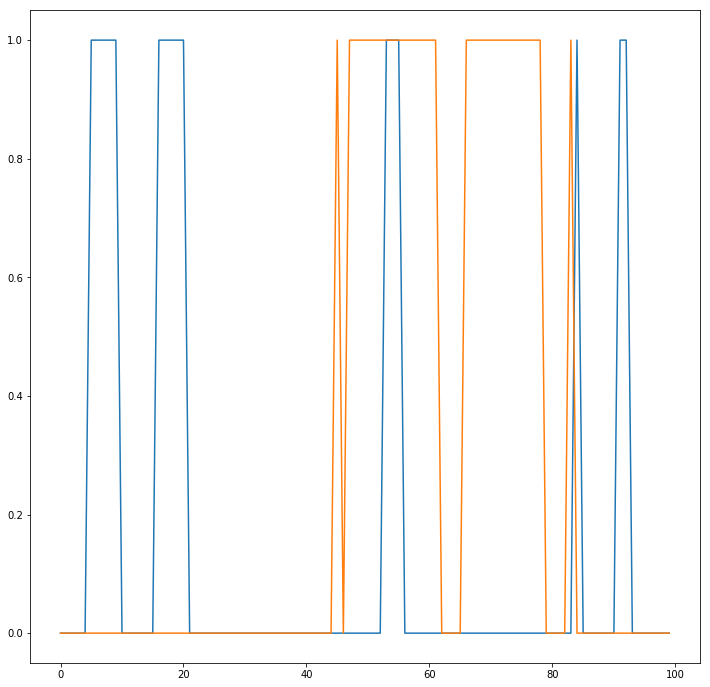

In [59]:
import matplotlib.pyplot as plt

sel1 = train[train['well id'] == 12][0:100].sort_values(by='depth, m')
sel2 = train[train['well id'] == 13][500:600].sort_values(by='depth, m')

sel = [sel1, sel2]
plt.figure(figsize=(12, 12))

for k in range(2):
    plt.plot(sel[k]['goal'].values)

plt.show()

In [112]:
dense_train_scaled.shape

(465096, 12)

In [115]:
sel1.head()

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
37254,12.0,2960.3915,0.348636,0.212456,0.962877,0.569947,0.112457,0.171329,0.891596,0.494653,0.358659,0.599186,0.427981,0.319490,ARGILLIT,0.0
50546,12.0,2960.4810,0.352979,0.259688,0.925168,0.553176,0.186954,0.176243,0.891596,0.515214,0.339948,0.579832,0.448637,0.323312,ARGILLIT,0.0
39625,12.0,2960.5705,0.358872,0.246714,0.928635,0.543274,0.163158,0.172269,0.853433,0.514698,0.336253,0.595663,0.453470,0.324556,ARGILLIT,0.0
41453,12.0,2960.7495,0.362284,0.199968,0.916895,0.517749,0.186569,0.173445,0.867248,0.514698,0.328469,0.593859,0.455971,0.324556,ARGILLIT,0.0
47350,12.0,2961.1075,0.393316,0.216673,0.949781,0.498938,0.941165,0.169449,0.773218,0.469875,0.361175,0.585193,0.413462,0.331143,ARGILLIT,0.0


In [125]:
sel1_mtx = dense_train_scaled[sel1.index]
sel2_mtx = dense_train_scaled[sel2.index]

In [171]:
sel3_mtx = sel2_mtx.copy()
sel3_idx = np.zeros(100)
for i, elem in tqdm(enumerate(sel1_mtx)):
    selected_arr = np.array(elem)
    min_dis = 100
    for j, elem2 in enumerate(sel2_mtx):
        selected_2_arr = np.array(elem2)
        dis = np.linalg.norm((selected_arr - selected_2_arr)) ** 0.5

        if dis < min_dis:
            min_dis = dis
            sel3_mtx[i] = selected_2_arr
            sel3_idx[i] = j


0it [00:00, ?it/s]
100it [00:00, 1573.43it/s]

In [172]:
np.linalg.norm(sel1_mtx[0] - sel3_mtx[0])

0.6611589645102943

In [173]:
np.linalg.norm(sel1_mtx[0] - sel3_mtx[1])

0.6611589645102943

In [179]:
sel3_idx

array([ 2.,  2.,  2.,  2.,  0.,  6., 60., 60., 60., 60.,  6.,  6., 95.,
       60., 81., 63., 63., 62., 62., 62., 62., 15.,  2., 51.,  2.,  2.,
        0.,  2.,  2.,  2.,  2.,  2.,  2.,  5.,  5.,  6.,  7.,  7., 60.,
       60., 60., 60., 65.,  7., 60., 60., 66., 29., 85., 85., 85., 85.,
       85.,  7., 63., 63., 64., 65., 65., 65., 65., 65., 66., 65., 60.,
       60., 60., 44., 60., 58., 58., 44., 44., 44., 44., 44., 44., 58.,
        6.,  6., 65., 65., 64., 84., 84., 84., 85., 85., 85., 85., 84.,
       84., 84., 92., 92., 64., 64., 64., 63., 62.])

In [190]:
sel1_mtx.shape

(100, 12)

In [208]:
y_exp_1 = sel1['goal'].values
y_exp_2 = sel2.iloc[sel3_idx]['goal'].values

In [213]:
sum(y_exp_1), sum(y_exp_2), sum(np.abs(y_exp_1 - y_exp_2))

(16.0, 21.0, 29.0)

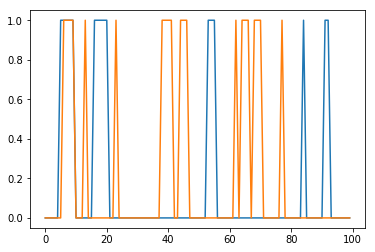

In [209]:
plt.plot(y_exp_1)
plt.plot(y_exp_2)
plt.show()

In [187]:
sel1.iloc[-1]

well id           12
depth, m     3059.92
bk          0.752485
GZ1         0.659425
GZ2         0.375714
GZ3         0.117235
GZ4         0.172792
GZ5         0.468864
GZ7         0.758494
DGK         0.282852
NKTD        0.515818
NKTM        0.583916
NKTR        0.323131
ALPS        0.266832
lith              NK
goal               0
Name: 48301, dtype: object

In [188]:
sel3.iloc[62]

well id           13
depth, m      2323.6
bk           0.49628
GZ1         0.394747
GZ2         0.298834
GZ3         0.264993
GZ4         0.163352
GZ5         0.415985
GZ7         0.624463
DGK         0.388472
NKTD        0.374225
NKTM        0.521351
NKTR        0.489557
ALPS        0.526468
lith         SAND_GL
goal               1
Name: 111961, dtype: object

In [174]:
sel3_mtx

array([[0.72465823, 0.24955773, 0.16964913, ..., 0.43262025, 0.64532522,
        0.4472698 ],
       [0.72465823, 0.24955773, 0.16964913, ..., 0.43262025, 0.64532522,
        0.4472698 ],
       [0.72465823, 0.24955773, 0.16964913, ..., 0.43262025, 0.64532522,
        0.4472698 ],
       ...,
       [0.73509558, 0.99706923, 0.4745518 , ..., 0.4893431 , 0.66501653,
        0.39450114],
       [0.73506722, 0.8987126 , 0.47983639, ..., 0.49004111, 0.66051194,
        0.39535541],
       [0.73503886, 0.8261151 , 0.48363413, ..., 0.49082734, 0.65765067,
        0.39975767]])

In [168]:
sel3_mtx[0]

array([0.72465823, 0.24955773, 0.16964913, 0.7545081 , 0.42134932,
       0.61719434, 0.14870588, 0.67445404, 0.47989692, 0.43262025,
       0.64532522, 0.4472698 ])

In [166]:
sel3.iloc[0]

well id            13
depth, m      2286.72
bk            0.24952
GZ1          0.169645
GZ2          0.754324
GZ3          0.421347
GZ4           0.61717
GZ5          0.148532
GZ7          0.674217
DGK          0.479664
NKTD         0.345923
NKTM         0.515723
NKTR          0.44663
ALPS         0.274478
lith        ALEVROLIT
goal                0
Name: 125230, dtype: object

In [108]:
sel1

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
37254,12.0,2960.3915,0.348636,0.212456,0.962877,0.569947,0.112457,0.171329,0.891596,0.494653,0.358659,0.599186,0.427981,0.319490,ARGILLIT,0.0
50546,12.0,2960.4810,0.352979,0.259688,0.925168,0.553176,0.186954,0.176243,0.891596,0.515214,0.339948,0.579832,0.448637,0.323312,ARGILLIT,0.0
39625,12.0,2960.5705,0.358872,0.246714,0.928635,0.543274,0.163158,0.172269,0.853433,0.514698,0.336253,0.595663,0.453470,0.324556,ARGILLIT,0.0
41453,12.0,2960.7495,0.362284,0.199968,0.916895,0.517749,0.186569,0.173445,0.867248,0.514698,0.328469,0.593859,0.455971,0.324556,ARGILLIT,0.0
47350,12.0,2961.1075,0.393316,0.216673,0.949781,0.498938,0.941165,0.169449,0.773218,0.469875,0.361175,0.585193,0.413462,0.331143,ARGILLIT,0.0
51846,12.0,2962.3605,0.568554,0.262570,0.142684,0.891890,0.191983,0.647547,0.189674,0.237772,0.438378,0.578517,0.367231,0.447170,SAND,1.0
44127,12.0,2962.4500,0.668117,0.311713,0.188653,0.153367,0.231132,0.669336,0.179216,0.293328,0.454259,0.589598,0.361335,0.457816,SAND,1.0
39196,12.0,2962.5395,0.696963,0.326955,0.182862,0.113684,0.185535,0.747727,0.158865,0.185823,0.466760,0.596458,0.352726,0.465922,SAND,1.0
26482,12.0,2962.6290,0.725894,0.342217,0.177747,0.115495,0.167956,0.774000,0.138397,0.162314,0.479261,0.633182,0.344418,0.474284,SAND,1.0
39259,12.0,2962.7185,0.683935,0.344477,0.163171,0.169826,0.157747,0.774000,0.126974,0.166672,0.484394,0.596282,0.332399,0.483148,SAND,1.0


In [87]:
sel3

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
125230,13.0,2286.7250,0.249520,0.169645,0.754324,0.421347,0.617170,0.148532,0.674217,0.479664,0.345923,0.515723,0.446630,0.274478,ALEVROLIT,0.0
127139,13.0,2286.7250,0.249520,0.169645,0.754324,0.421347,0.617170,0.148532,0.674217,0.479664,0.345923,0.515723,0.446630,0.274478,ALEVROLIT,0.0
128492,13.0,2286.7250,0.249520,0.169645,0.754324,0.421347,0.617170,0.148532,0.674217,0.479664,0.345923,0.515723,0.446630,0.274478,ALEVROLIT,0.0
121742,13.0,2286.7250,0.249520,0.169645,0.754324,0.421347,0.617170,0.148532,0.674217,0.479664,0.345923,0.515723,0.446630,0.274478,ALEVROLIT,0.0
110374,13.0,2286.5460,0.219638,0.173533,0.835496,0.425187,0.672438,0.148532,0.647817,0.451842,0.342149,0.517482,0.439241,0.271787,ALEVROLIT,0.0
101809,13.0,2293.6165,0.126582,0.278489,0.198983,0.988163,0.176769,0.561462,0.166625,0.291619,0.366285,0.516954,0.463939,0.283322,DENSE,0.0
126198,13.0,2319.3030,0.812658,0.471944,0.277695,0.158572,0.251166,0.544776,0.481395,0.181355,0.373125,0.532257,0.395185,0.571436,SAND_ALEV,1.0
114500,13.0,2319.3030,0.812658,0.471944,0.277695,0.158572,0.251166,0.544776,0.481395,0.181355,0.373125,0.532257,0.395185,0.571436,SAND_ALEV,1.0
102011,13.0,2319.3030,0.812658,0.471944,0.277695,0.158572,0.251166,0.544776,0.481395,0.181355,0.373125,0.532257,0.395185,0.571436,SAND_ALEV,1.0
105639,13.0,2319.3030,0.812658,0.471944,0.277695,0.158572,0.251166,0.544776,0.481395,0.181355,0.373125,0.532257,0.395185,0.571436,SAND_ALEV,1.0
